In [1]:
import jieba
import jieba.analyse
import requests
import pymysql
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Open database connection
conn = pymysql.connect(host='192.168.35.168'
                       ,port=3306
                       ,user='amber'
                       ,passwd='amber'
                       ,db='news')
# prepare a cursor object using cursor() method
cursor = conn.cursor()
sql = "SELECT * FROM news_total "
output_csv_file = 'C:/Users/Student/Desktop/news/text.csv'
userdict_txt = "C:/Users/Student/Desktop/news/userdict0602.txt"
cursor.execute(sql)
results = cursor.fetchall

In [2]:
print(results)

<bound method Cursor.fetchall of <pymysql.cursors.Cursor object at 0x000001F2ED2C66D8>>


In [3]:
np.array(results)

array(<bound method Cursor.fetchall of <pymysql.cursors.Cursor object at 0x000001F2ED2C66D8>>,
      dtype=object)

In [4]:
df = pd.read_sql(sql, con=conn)

In [14]:
# df

,title,time,author,text,url,tags,type_list,source,views,share,like,type_final,tags_final,weight,positive,negative
0,翁半夜敲牆5年鄰崩潰罹病,2017/01/01,游仁汶,新北市林姓男子與鄰居蔡家夫婦失和，竟涉嫌從7年前開始到前年7月間，幾乎每天半夜或清晨，藉敲打...,http://tw.news.appledaily.com/headline/daily/2...,,社會,蘋果,,,,社會,焦慮、親友、噪音、聲響、蒐證、權利、起訴、強制、林男、社區、蔡家、鄰居、敲擊、牆壁、睡眠、間...,"{'蔡家': 0.9774338209918237, '林男': 0.67668495299...",NaN,NaN
1,男謊報女友墜崖百警白忙19小時,2017/01/01,魏嘉良、鄧惠珍,南投一名領有精神障礙身心手冊的張姓男子，前晚「自首」不滿陳姓女友欠300萬元不還，將女友推落...,http://tw.news.appledaily.com/headline/daily/2...,,社會,蘋果,,,,社會,搜救、女友、推落、謊報、手機、警方、張姓男子、百警、南投縣、通聯紀錄、山崖、精神障礙、南投、...,"{'陳女': 0.9962306252416666, '張男': 0.89660756271...",NaN,NaN
2,WSBL今日賽程,2017/03/29,,18：00台元vs.台電(季軍戰)19：40國泰vs.電信(冠軍戰)地點：新莊體育館直播：緯...,http://tw.sports.appledaily.com/daily/20170329...,,籃球瘋,蘋果,,,,運動,台元、季軍戰、賽程、台電、國泰、WSBL、vs、電信、直播、緯來、冠軍戰、新莊體育館,"{'vs': 1.8391950004461537, 'WSBL': 0.919597500...",NaN,NaN
3,豬哥亮病房聽韓文舞曲洩聲「我的外套呢」,2017/04/11,昨早至台大守候,豬哥亮因罹大腸癌住進台大醫院近1個月，醫師上周表示將評估是否能出院,http://tw.entertainment.appledaily.com/daily/2...,,娛樂名人,蘋果,,,,娛樂,豬哥亮、外套、大腸癌、台大醫院、洩聲、出院、韓文、醫師、病房、舞曲、住進,"{'豬哥亮': 1.9924612504833332, '韓文': 0.9962306252...",NaN,NaN
4,昨日戰績,2017/06/30,,中央聯盟中日(主) 2:0 阪神太平洋聯盟軟銀(主) 1:0 日本火腿,http://tw.sports.appledaily.com/daily/20170630...,,投打對決,蘋果,,,,運動,中日、日本火腿、阪神、戰績、中央聯盟、太平洋聯盟、軟銀,"{'戰績': 1.7078239289857142, '中央聯盟': 1.707823928...",NaN,NaN
5,暖冬催快海藻生長老梅綠石槽綠了,2017/01/01,陳偉周,新北市知名景點石門「老梅綠石槽」，往年都是過年後綠藻才開始生長，3、4月時當地岩石就會長滿綠...,http://tw.news.appledaily.com/headline/daily/2...,,社會,蘋果,,,,社會,暖冬、綠藻、專家、綠油油、過年、老梅綠石槽、季節限定、石門、生長、岩石、提早、知名景點、海水...,"{'綠藻': 0.609937117494898, '暖冬': 0.473391533020...",NaN,NaN
6,少年無照騎車害命單親母判賠28萬,2017/01/01,辛啟松,台南市一名12歲黃姓少年，前年8月中深夜騎機車搭載陳姓少年街頭闖紅燈，撞上一輛轎車，黃姓少年...,http://tw.news.appledaily.com/headline/daily/2...,,社會,蘋果,,,,社會,重傷、騎機車、失竊、眼部、視力、車禍、闖紅燈、無照騎車、女駕駛、台南地院、母子、判賠、轎車、...,"{'陳姓少年': 0.5831593903853658, '闖紅燈': 0.43736954...",NaN,NaN
7,巨輪甩飛毀圍籬撞車,2017/01/01,,苗栗縣苗140線苑裡交流道附近，一輛由張姓男子（56歲）駕駛的砂石車，昨天行進間右後輪軸斷裂...,http://tw.news.appledaily.com/headline/daily/2...,,社會,蘋果,,,,社會,右後輪、甩飛、砂石車、廂型車、圍籬、小圖、撞毀、張姓男子、苗栗縣、駕駛、檳榔攤、苑裡、斷裂、...,"{'圍籬': 0.5692746429952381, '斷裂': 0.56927464299...",NaN,NaN
8,三民險勝南山福岡第1高校擒U20,2017/07/10,,地點：台北市立體育館； FOX體育2台、FOX官網直播,http://tw.sports.appledaily.com/daily/20170710...,,籃球瘋,蘋果,,,,運動,台北市立、險勝、三民、體育、官網、南山、福岡、FOX、高校、體育館、直播、U20,"{'FOX': 1.8391950004461537, '台北市立': 0.98477425...",NaN,NaN
9,NPB昨日戰績,2017/07/29,,中央聯盟阪神(客) 5:0 中日廣島(主) 7:1 養樂多太平洋聯盟西武(客) 5:4 羅德...,http://tw.sports.appledaily.com/daily/20170729...,,投打對決,蘋果,,,,運動,中日、羅德、廣島、樂天、阪神、養樂多、戰績、中央聯盟、太平洋聯盟、NPB、歐力士、西武,"{'NPB': 0.9962306252416666, '戰績': 0.9962306252...",NaN,NaN


In [17]:
category_count = df['type_final'].value_counts()
category_p =category_count/ len(df)
sample=14000
sample_count=(category_p*sample).round(0)
sample_count

生活    3668.0
社會    2736.0
國際    2349.0
娛樂    2245.0
政治    1628.0
運動     909.0
經濟     465.0
Name: type_final, dtype: float64

In [66]:
fliter0= (df["type_final"] == "生活")
dfr_data = df[fliter0].sample(n=3668, axis=0)

fliter1 = (df["type_final"] == "社會")
f1=df[fliter1].sample(n=2736, axis=0)

fliter2 = (df["type_final"] == "國際")
f2=df[fliter2].sample(n=2349, axis=0)

fliter3 = (df["type_final"] == "娛樂")
f3 =df[fliter3].sample(n=2245, axis=0)

fliter4 = (df["type_final"] == "政治")
f4 =df[fliter4].sample(n=1628, axis=0)

fliter5 = (df["type_final"] == "運動")
f5 = df[fliter5].sample(n=909, axis=0)

fliter6 = (df["type_final"] == "經濟")
f6 = df[fliter6].sample(n=465, axis=0)



In [67]:

f=[f1,f2,f3,f4,f5,f6]
for i in f :
    dfr_data=dfr_data.append(i)
    

In [68]:
dfr_data

,title,time,author,text,url,tags,type_list,source,views,share,like,type_final,tags_final,weight,positive,negative
565370,雪霰停！陽明山恢復例假日交管_不需雪鏈,2018/02/04,,目前陽明山山區因為鞍部、二子坪只有下雨，沒有發現有下雪霰的狀況，因此暫時解除管制，並於路口保...,https://news.tvbs.com.tw/focus/864051,陽明山、管制,生活,TVBS,,,,生活,有下、下雨、警力、山區、正常、交管、車流、鞍部、管制、雪鏈、解除管制、仰德大道、二子坪、雪霰...,"{'例假日': 1.1583898043333334, '雪霰': 0.9962306252...",NaN,NaN
393859,從小住眷村旁_簡錦陸發心為15名老兵孤墳安厝,2018/08/02,,從小住眷村旁的簡錦陸去年發現大林公墓有15座老兵墓穴塌陷，發心為老兵起掘安厝，在國軍退除役官...,https://www.setn.com/News.aspx?NewsID=410987,公墓、嘉義、老兵、簡錦陸、郭豫臨,生活,三立,,,,生活,嘉義、單身、郭豫臨、新村、安厝、大林、從小住、軍人、忠靈祠、簡錦陸、老兵、公墓、嘉義縣、榮民...,"{'簡錦陸': 0.5659061539834319, '榮民': 0.5659061539...",NaN,NaN
415851,顛覆國車的框架_納智捷GT220試駕,2018/10/05,鍾釗榛,Luxgen這個台灣唯一的自主品牌，並沒有因為身分而獲得台灣人過多關愛，相反的，許多質疑的聲...,https://www.setn.com/News.aspx?NewsID=436641,LUXGEN、納智捷、U6、GT220,汽車,三立,,,,生活,渦輪引擎、Duct、渦輪、避震器、調校、U6、Naca、Ray、品牌、水野和敏、底盤、GT、...,"{'GT220': 0.3919595902590164, 'U6': 0.39195959...",NaN,NaN
242670,白天回溫_吳德榮：入夜後北部空曠區再降至12度,2017/03/03,,氣象專家吳德榮表示，這波冷空氣最強時間已過，今白天北部高溫可回升至19、20度，中南部更高，...,https://www.setn.com/News.aspx?NewsID=229774,天氣、低溫、溫度、回溫、輻射冷卻、專家、吳德榮,生活,三立,,,,生活,氣溫、東北季風、北部、明晨、沿海、標準、吳德榮、東半部、西半部、中南部、冷空氣、低溫、輻射冷...,"{'吳德榮': 0.5903588890320988, '空曠': 0.4427691667...",NaN,NaN
241667,嚨嘸人！連假六福村空蕩蕩_天氣低溫濕冷影響人潮,2017/02/26,張浩譯、廖宜德,民眾把握連假出遊好機會，國道不少路段出現時速低於20的龜速慘況，人應該都出門玩了，但怎麼會出...,https://www.setn.com/News.aspx?NewsID=228568,優惠、連假、出遊、六福村、九族文化村、人潮、劍湖山,生活,三立,,,,生活,溫濕、三千五百、室內、連假、嘸人、劍湖山、下雨、六福村樂園、破萬、四日、出遊、入園、天氣、六...,"{'六福村': 0.5152917027112068, '劍湖山': 0.515291702...",NaN,NaN
366995,必看！過勞工作恐傷身_「疲勞臭」聞腋下就知道,2018/05/15,,現代人生活壓力大，許多上班族時常得面臨到加班的情況，經過一天的操勞，疲憊地回到家後隔天同樣也...,https://www.setn.com/News.aspx?NewsID=379873,日本、上班族、健康、壓力、腋下、味道、刺鼻,生活,三立,,,,生活,疲憊、壓力、上班族、生活壓力、家後、肝臟、必看、疲勞、醫師、操勞、心靈、刺鼻、飛田、砂織、健...,"{'疲勞': 0.7356780001784615, '腋下': 0.73567800017...",NaN,NaN
448258,口袋要夠深！保時捷隱藏版車款首亮相_車商僅供VIP賞車,2018/12/21,劉雅文、楊育鑫,2019年台北新車大展，今天熱鬧開展了，超過20家車商，都在現場展示最新車款，並且提供民眾試...,https://www.setn.com/News.aspx?NewsID=474121,保時捷、VIP、賞車、隱藏版車款、車展,汽車,三立,,,,生活,車展、保時捷、車款、隱藏版車款、口袋、展場、排排站、車商、身分、試乘、熱鬧、聲控、新車、僅供...,"{'車商': 0.74717296893125, 'VIP': 0.747172968931...",NaN,NaN
122372,8成4上班族喊苦！最累竟是這5種行業,2018/09/27,,"台灣2017年總工時平均2,035小時，台灣勞工比他國各地勞工多出34.5個工作日。國內上班...",https://news.ebc.net.tw/News/Article/132324,辛苦、工作,生活,東森,,,,生活,勞工、鬥爭、勞心、1111人力銀行、修路、工作、辛苦、台灣、上班族、職場、原因、下水道、李大...,"{'上班族': 0.392771880962963, '勞苦': 0.29517944451...",NaN,NaN
490311,毛孩腿軟堅決不過吊橋_主人暖心趴下陪爬過橋,2019/04/09,,助理王譽儒日前國外有名網友上傳一段自家毛孩Lucky過吊橋的逗趣影片，影片中可見Lucky一...,https://www.setn.com/News.aspx?NewsID=524065,吊橋、毛小孩、主人、拒絕、趴下,生活,三立,,,,生活,王譽、上傳、趴下、暖心、毛小孩、連哄帶、誘導、跪地、見此、吊橋、趴低、Lucky、漫長、偉大...,"{'吊橋': 1.8596305004511111, 'Lucky': 1.85963050...",NaN,NaN
296534,「拍影片才有錢」姑姑遙控小熊逗姪女_意外釣出超齡爆料,2017/09/18,,影音羅正輝小孩的童言童語竟然可以這麼超齡！網紅「安啾」買了一隻可以用無線電對話的「泰迪熊」，...,https://www.setn.com/News.aspx?NewsID=295800,可愛、小孩、泰迪熊、無線電、網紅、安啾,生活,三立,,,,生活,童言童語、聊起、反應、逗逗、遙控、好氣、影音、可愛、一熊、姪女、爆料、嚇了、小熊、網紅、拍影...,"{'泰迪熊': 1.4943459378625, '拍影片': 1.120759453396...",NaN,NaN


In [69]:
dfr_data['source'].value_counts()

三立      5794
TVBS    3250
東森      2033
新頭殼     1796
蘋果      1127
Name: source, dtype: int64

In [70]:
categories = dfr_data.groupby('type_final').size().index.tolist()
category_dict = {}
int_category = {}
for i, k in enumerate(categories):
    category_dict.update({k:i})
    int_category.update({i:k})

In [72]:
dfr_data['c2id'] = dfr_data['type_final'].apply(lambda x: category_dict[x])
# print(dfr_data['c2id'])

565370    3
393859    3
415851    3
242670    3
241667    3
366995    3
448258    3
122372    3
490311    3
296534    3
173055    3
419492    3
466873    3
553250    3
422360    3
115077    3
456779    3
503510    3
87479     3
165903    3
145059    3
151857    3
105173    3
477319    3
254348    3
136252    3
520124    3
235289    3
159283    3
144287    3
         ..
403248    5
412263    5
240160    5
23444     5
279402    5
45156     5
354998    5
346052    5
7649      5
25208     5
20183     5
289320    5
422700    5
464271    5
293992    5
30297     5
2460      5
347558    5
35831     5
434495    5
262300    5
244479    5
143115    5
424919    5
129297    5
50693     5
306569    5
372398    5
436326    5
50755     5
Name: c2id, Length: 14000, dtype: int64


In [18]:
# df['tags_final']= df['tags_final'].str.split("、") 
# print(df['tags_final'])

In [73]:
data1=dfr_data[["tags_final","c2id"]]

In [74]:
tags= dfr_data['tags_final'].str.replace("、"," ")
train_data=[]
for i in tags:
    train_data.append(i)
# print(train_data)



In [75]:
train_target=[]
for i in dfr_data['c2id']:
    train_target.append(i)
# print(train_target)     

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(train_data,train_target,test_size=0.2,stratify=train_target)
# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)
#shuffle=True


In [23]:
# type(y_test)

In [24]:
# train_data1=[]
# for i in range(len(train_data)):
#     for j in range(len(train_data[i])):
#         train_data1.append(train_data[i][j])
        

In [77]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer   
vectorizer= CountVectorizer();  
counts_all = vectorizer.fit_transform(train_data);
count_v1= CountVectorizer(vocabulary=vectorizer.vocabulary_);  
counts_train = count_v1.fit_transform(x_train);   
print ("the shape of train is "+repr(counts_train.shape))  
count_v2 = CountVectorizer(vocabulary=vectorizer.vocabulary_);  
counts_test = count_v2.fit_transform(x_test);  
print ("the shape of test is "+repr(counts_test.shape))  
  
tfidftransformer = TfidfTransformer();    
x_train = tfidftransformer.fit(counts_train).transform(counts_train);
x_test = tfidftransformer.fit(counts_test).transform(counts_test);

the shape of train is (11200, 83624)
the shape of test is (2800, 83624)


In [ ]:
# print(vectorizer.get_feature_names())  
# print(vectorizer.vocabulary_)
# print(counts_all.toarray())

### navie bays

In [78]:
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


clf = MultinomialNB(alpha = 0.01)   
clf.fit(x_train, y_train);  
y_pred = clf.predict(x_test);
num = 0
preds = y_pred.tolist()
# print(preds)
for i,pred in enumerate(preds):
    if int(pred) == int(y_test[i]):
        num += 1
    else :
        continue
print('precision_score:' + str(float(num) / len(preds)))
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


precision_score:0.7982142857142858
0.7982142857142858
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       470
           1       0.84      0.89      0.86       449
           2       0.80      0.85      0.83       325
           3       0.82      0.74      0.78       734
           4       0.76      0.84      0.80       547
           5       0.53      0.72      0.61        93
           6       0.88      0.95      0.91       182

   micro avg       0.80      0.80      0.80      2800
   macro avg       0.78      0.81      0.79      2800
weighted avg       0.80      0.80      0.80      2800



In [79]:
mat=confusion_matrix(y_test, y_pred)
mat

array([[319,  27,  19,  33,  49,  18,   5],
       [ 13, 400,   2,  14,   9,   4,   7],
       [ 19,   5, 276,  14,   8,   1,   2],
       [ 30,  30,  22, 540,  73,  32,   7],
       [ 11,   9,  20,  41, 461,   4,   1],
       [  4,   2,   3,  15,   1,  67,   1],
       [  0,   4,   2,   2,   2,   0, 172]], dtype=int64)

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

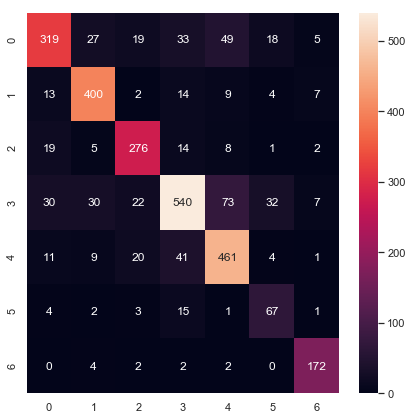

In [81]:
df_cm = pd.DataFrame(mat, index = [i for i in clf.classes_],
                  columns = [i for i in clf.classes_])
plt.figure(figsize = (7,7))
sns.heatmap(mat, annot=True,fmt='d') #cmap="YlGnBu",linewidths=.5

### knn 


In [82]:
from sklearn.neighbors import KNeighborsClassifier  

for x in range(1,10):  
    knnclf = KNeighborsClassifier(n_neighbors=x)
    knnclf.fit(x_train,y_train)  
    preds = knnclf.predict(x_test);
    num = 0
    preds = preds.tolist()
    for i,pred in enumerate(preds):
        if int(pred) == int(y_test[i]):
            num += 1
    print ('K= '+str(x)+', precision_score:' + str(float(num) / len(preds)))

K= 1, precision_score:0.7071428571428572
K= 2, precision_score:0.6957142857142857
K= 3, precision_score:0.7367857142857143
K= 4, precision_score:0.7642857142857142
K= 5, precision_score:0.7667857142857143
K= 6, precision_score:0.7735714285714286
K= 7, precision_score:0.7721428571428571
K= 8, precision_score:0.7778571428571428
K= 9, precision_score:0.7764285714285715


### SVM
sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False,

tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None,random_state=None)
 
c 懲罰項
kernel ：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 

In [83]:
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svclf = SVC(kernel = 'linear',C=1) 
svclf.fit(x_train,y_train)  
y_pred = svclf.predict(x_test);  
num = 0
preds = y_pred.tolist()
for i,pred in enumerate(preds):
    if int(pred) == int(y_test[i]):
        num += 1
print('precision_score:' + str(float(num) / len(preds)))
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

precision_score:0.8121428571428572
0.8121428571428572
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       470
           1       0.90      0.85      0.87       449
           2       0.87      0.75      0.81       325
           3       0.71      0.86      0.78       734
           4       0.85      0.81      0.83       547
           5       0.89      0.43      0.58        93
           6       0.91      0.86      0.88       182

   micro avg       0.81      0.81      0.81      2800
   macro avg       0.85      0.77      0.79      2800
weighted avg       0.82      0.81      0.81      2800



In [84]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[373,  12,  10,  49,  18,   3,   5],
       [ 16, 382,   2,  37,   6,   1,   5],
       [ 16,   5, 245,  47,  11,   0,   1],
       [ 30,  12,  11, 634,  42,   1,   4],
       [ 15,   7,  11,  70, 444,   0,   0],
       [  8,   2,   2,  40,   1,  40,   0],
       [  6,   5,   2,  13,   0,   0, 156]], dtype=int64)

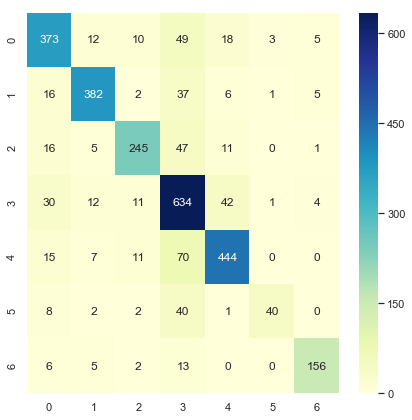

In [85]:
df_cm = pd.DataFrame(mat, index = [i for i in clf.classes_],
                  columns = [i for i in clf.classes_])
plt.figure(figsize = (7,7))
sns.heatmap(mat, annot=True,fmt="d",cmap="YlGnBu") #cmap="YlGnBu",linewidths=.5

In [ ]:
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svclf = SVC(kernel = 'rbf',C=13,gamma=0.04) 
svclf.fit(x_train,y_train)  
y_pred = svclf.predict(x_test);  
num = 0
preds = y_pred.tolist()
for i,pred in enumerate(preds):
    if int(pred) == int(y_test[i]):
        num += 1
print('precision_score:' + str(float(num) / len(preds)))
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

In [90]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(random_state=1,n_estimators=500,n_jobs=-1,criterion='gini',) #oob_score=False

model.fit(x_train, y_train)

model.score(x_test,y_test)
# 跑了n_estimators=100、500 ~ 0.76

0.7392857142857143

In [89]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.1,max_depth=10,n_estimators=500,n_jobs=-1)

model.fit(x_train, y_train)

model.score(x_test,y_test)

0.7421428571428571

In [91]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.1,max_depth=30,n_estimators=600,n_jobs=-1)

model.fit(x_train, y_train)

model.score(x_test,y_test)

0.7439285714285714

In [92]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1,n_estimators=1000,learning_rate=0.7)

model.fit(x_train, y_train)

model.score(x_test,y_test)

0.5471428571428572